In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import category_encoders as ce

date_format = "%m/%d/%Y"

### Predicting Customer Response
Predictive Methods of Data Mining

# I. Data Understanding


In [54]:
df = pd.read_excel('Group35_SmartHome_Campaign.xlsx', index_col="Custid")

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [55]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntLighting,MntCameras,...,Complain,Z_CostContact,Z_Revenue,DepVar,Group,Element1,Element2,Element3,Element4,Element5
Custid,,,,,,,,,,,,,,,,,,,,,
350001144,1974,Master,Divorced,75436.0,0,2,2018-10-05,32,353,19,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001148,1992,PhD,Single,37029.0,1,0,2019-03-17,30,6,7,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001150,1963,Graduation,Single,112765.0,0,0,2018-06-05,72,465,20,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001155,1975,PhD,Divorced,50518.0,1,0,2019-02-17,42,14,5,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001156,1977,PhD,Together,41238.0,2,0,2017-10-10,59,244,12,...,0,4,14,1,Group35,M2014343,M20200125,M20200319,NaN,NaN


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2500.0,1974.177200,12.024194,1946.0,1964.0,1975.0,1983.0,2001.0
Income,2475.0,69900.762424,29712.980963,2268.0,47223.0,70380.0,92933.0,189666.0
Kidhome,2500.0,0.443200,0.540824,0.0,0.0,0.0,1.0,2.0
Teenhome,2500.0,0.485600,0.551647,0.0,0.0,0.0,1.0,2.0
Recency,2500.0,49.907200,28.710059,0.0,25.0,51.0,74.0,99.0
MntLighting,2500.0,368.802800,404.467450,0.0,28.0,219.0,614.0,1761.0
MntCameras,2500.0,26.668000,40.202252,0.0,1.0,8.0,33.0,199.0
MntDoor_Locks,2500.0,189.104400,245.271410,0.0,18.0,73.0,267.0,1093.0
MntThermostats,2500.0,32.678400,48.236618,0.0,3.0,10.0,42.0,239.0
MntSecurity_Systems,2453.0,32.688137,50.833567,0.0,3.0,10.0,38.0,267.0


# II. Data Preparation
First, we will convert the dates column into numerical values. Then, we will create a MntTotal column that is the sum of all other monetary columns.</p>

In [57]:
df_prep = df.copy(deep=True)

In [58]:
#Creating columns for age and days as a Customer instead of using the regular values
df_prep['Age'] = 2020 - df_prep['Year_Birth']
df_prep['DaysAsCustomer'] = (datetime.strptime('03/18/2021', date_format) - df_prep['Dt_Customer']).dt.days

#Changing the columns teenhome and kidhome to boolean
df_prep["Kidhome"] = np.where(df_prep["Kidhome"] == 0, df_prep["Kidhome"], 1)
df_prep["Teenhome"] = np.where(df_prep["Teenhome"] == 0, df_prep["Teenhome"], 1)
#Creating new column to know if the person has kid, teen, both or none
df_prep["Children"] = df_prep["Kidhome"] + df_prep["Teenhome"]

#Droping original columns
df_prep.drop(['Year_Birth', 'Dt_Customer'], axis=1, inplace=True)

#Droping the columns for group identification
df_prep.drop(['Group', 'Element1', 'Element2', 'Element3', 'Element4', 'Element5'], axis=1, inplace=True)

<h2>Dealing with Missing Values</h2>

In [59]:
print(df_prep.isna().sum())

Education               0
Marital_Status          0
Income                 25
Kidhome                 0
Teenhome                0
Recency                 0
MntLighting             0
MntCameras              0
MntDoor_Locks           0
MntThermostats          0
MntSecurity_Systems    47
MntPremium             42
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
Complain                0
Z_CostContact           0
Z_Revenue               0
DepVar                  0
Age                     0
DaysAsCustomer          0
Children                0
dtype: int64


In [60]:
#Filling NaN on Income for the meadian of their peers with same children and education background

#Maybe explore the values for income first and then dicide on how to handle the NaN

df_prep['Income'] = df_prep.groupby(['Education', 'Children'])['Income'].apply(lambda x: x.fillna(x.median()))

In [61]:
#Filling NaN on MntSecurity_Systems and MntPremium by 0
df_prep['MntSecurity_Systems'].fillna(0, inplace=True)
df_prep['MntPremium'].fillna(0, inplace=True)

<h2>Feature Engineering</h2>

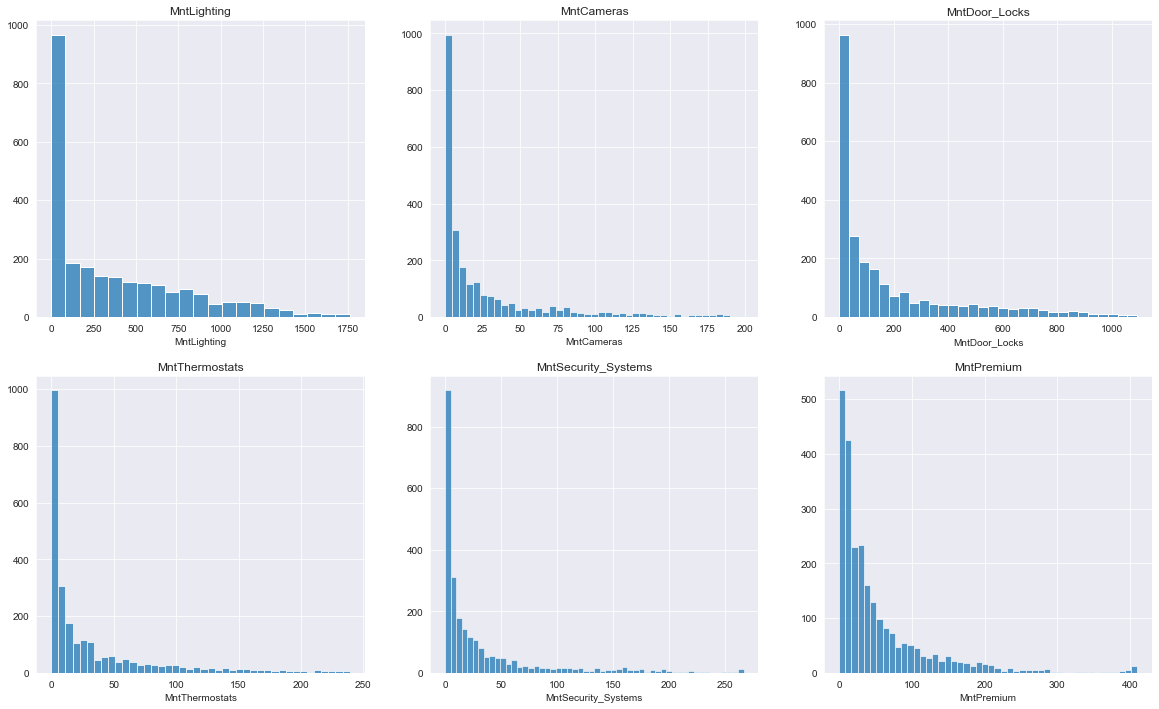

In [62]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

sns.histplot(data=df_prep, x='MntLighting', ax=axes[0][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='MntCameras', ax=axes[0][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='MntDoor_Locks', ax=axes[0][2]).set(ylabel=None);
sns.histplot(data=df_prep, x='MntThermostats', ax=axes[1][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='MntSecurity_Systems', ax=axes[1][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='MntPremium', ax=axes[1][2]).set(ylabel=None);

axes[0][0].set(title='MntLighting');
axes[0][1].set(title='MntCameras');
axes[0][2].set(title='MntDoor_Locks');
axes[1][0].set(title='MntThermostats');
axes[1][1].set(title='MntSecurity_Systems');
axes[1][2].set(title='MntPremium');

plt.show();

<h4>Monetary Spends on Products</h4>
<p>We can clearly see that all mnt columns have a negative distribution that will later affect also the Total spends of the users. To solve such high distribution, we will apply a logoritm scale to all mnt values</p>

In [63]:
df_prep["logLighting"] = np.where(df_prep["MntLighting"] == 0, df_prep["MntLighting"], np.log(df_prep["MntLighting"]))
df_prep["logCameras"] = np.where(df_prep["MntCameras"] == 0, df_prep["MntCameras"], np.log(df_prep["MntCameras"]))
df_prep["logDoor_Locks"] = np.where(df_prep["MntDoor_Locks"] == 0, df_prep["MntDoor_Locks"], np.log(df_prep["MntDoor_Locks"]))
df_prep["logThermostats"] = np.where(df_prep["MntThermostats"] == 0, df_prep["MntThermostats"], np.log(df_prep["MntThermostats"]))
df_prep["logSecurity_Systems"] = np.where(df_prep["MntSecurity_Systems"] == 0, df_prep["MntSecurity_Systems"], np.log(df_prep["MntSecurity_Systems"]))
df_prep["logPremium"] = np.where(df_prep["MntPremium"] == 0, df_prep["MntPremium"], np.log(df_prep["MntPremium"]))

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/s

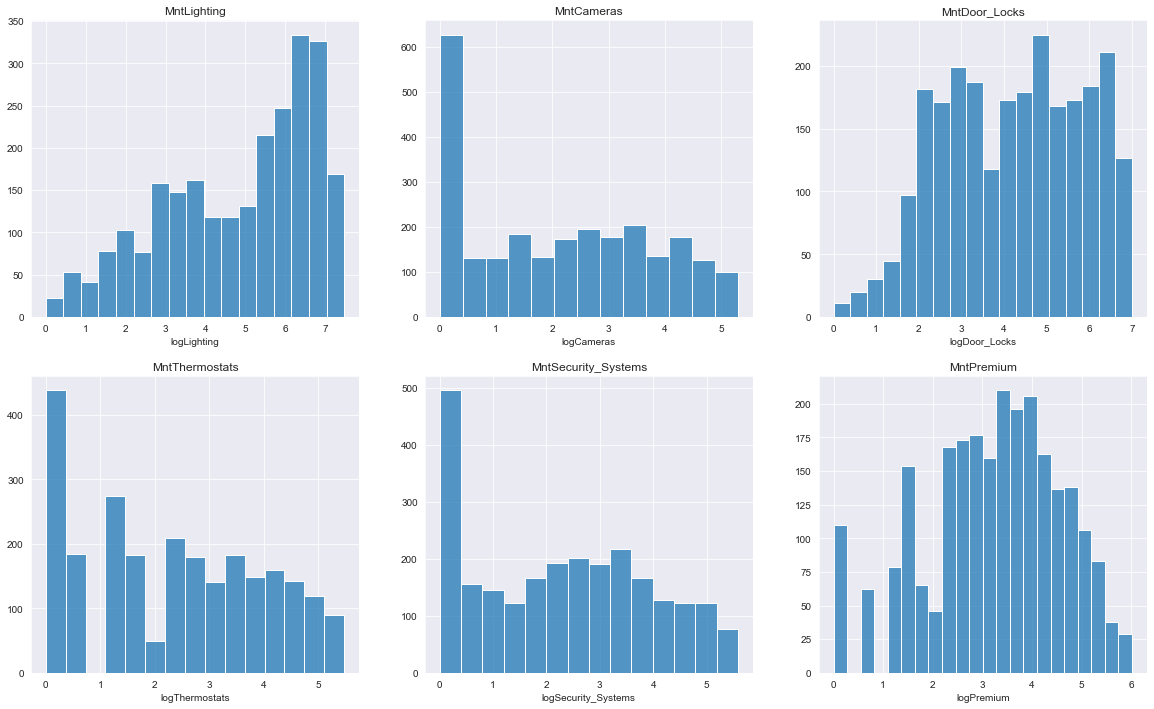

In [64]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

sns.histplot(data=df_prep, x='logLighting', ax=axes[0][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='logCameras', ax=axes[0][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='logDoor_Locks', ax=axes[0][2]).set(ylabel=None);
sns.histplot(data=df_prep, x='logThermostats', ax=axes[1][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='logSecurity_Systems', ax=axes[1][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='logPremium', ax=axes[1][2]).set(ylabel=None);


axes[0][0].set(title='MntLighting');
axes[0][1].set(title='MntCameras');
axes[0][2].set(title='MntDoor_Locks');
axes[1][0].set(title='MntThermostats');
axes[1][1].set(title='MntSecurity_Systems');
axes[1][2].set(title='MntPremium');

plt.show();

<h3>Income, Age and Number of Website Monthly Visits Analysis</h3>

In [65]:
#Creating a column with the sum of the Mnt Values
df_prep["MntTotal"] = df_prep["MntLighting"] + df_prep["MntCameras"] + df_prep["MntDoor_Locks"] + df_prep["MntThermostats"] + df_prep["MntSecurity_Systems"] + df_prep["MntPremium"]
df_prep["logTotal"] = df_prep["logLighting"] + df_prep["logCameras"] + df_prep["logDoor_Locks"] + df_prep["logThermostats"] + df_prep["logSecurity_Systems"] + df_prep["logPremium"]

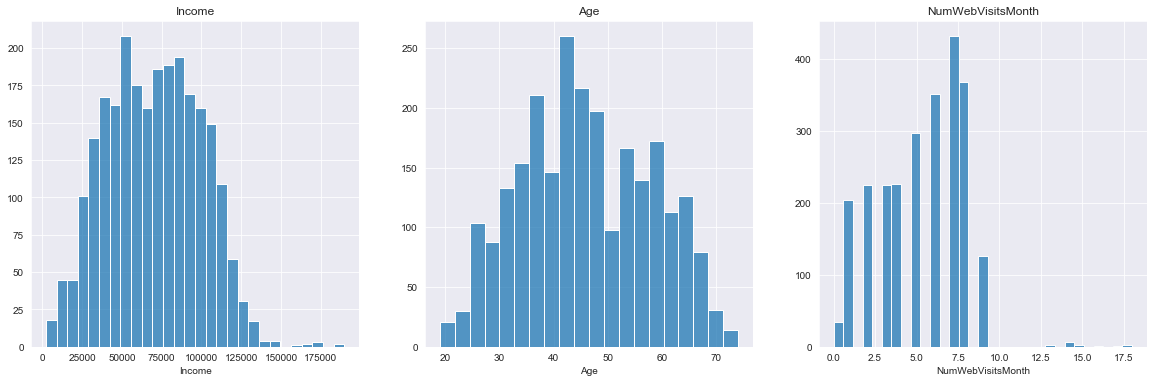

In [66]:
#Dealing with the distribuition of the Purchased habits
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

sns.histplot(data=df_prep, x='Income', ax=ax[0]).set(ylabel=None);
sns.histplot(data=df_prep, x='Age', ax=ax[1]).set(ylabel=None);
sns.histplot(data=df_prep, x='NumWebVisitsMonth', ax=ax[2]).set(ylabel=None);

ax[0].set(title='Income');
ax[1].set(title='Age');
ax[2].set(title='NumWebVisitsMonth');

plt.show()

<h4>Outcomes</h4>
<ul>
<li><b>Income: </b>we will remove all records with icnome above 150.000 yearly.</li>
<li><b>Age: </b>to avoid binning to many columns, we will leave age as it is</li>
<li><b>Number of Monthly Web Visists: </b>just leave it as it is.</li>
</ul>

In [67]:
#Dealing with outliers from the income column

incomeCap = 150000

outliers = df_prep[df_prep["Income"] > incomeCap].shape[0] / df.shape[0]
print('The outlier removal would keep:', round((1 - outliers),4), 'of the dataset')
print('The removal will delete ', df[df["Income"] > incomeCap].shape[0], ' records')

The outlier removal would keep: 0.9968 of the dataset
The removal will delete  8  records


In [68]:
df_prep = df_prep[df_prep["Income"] < incomeCap]

In [69]:
df_prep.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntLighting,MntCameras,MntDoor_Locks,MntThermostats,...,DaysAsCustomer,Children,logLighting,logCameras,logDoor_Locks,logThermostats,logSecurity_Systems,logPremium,MntTotal,logTotal
Custid,,,,,,,,,,,,,,,,,,,,,
350001144,Master,Divorced,75436.0,0,1,32,353,19,179,11,...,895,1,5.866468,2.944439,5.187386,2.397895,1.609438,2.397895,578.0,20.403521
350001148,PhD,Single,37029.0,1,0,30,6,7,16,0,...,732,1,1.791759,1.945910,2.772589,0.000000,1.791759,2.197225,44.0,10.499242
350001150,Graduation,Single,112765.0,0,0,72,465,20,785,35,...,1017,0,6.142037,2.995732,6.665684,3.555348,4.158883,5.278115,1565.0,28.795799
350001155,PhD,Divorced,50518.0,1,0,42,14,5,29,5,...,760,1,2.639057,1.609438,3.367296,1.609438,1.386294,2.833213,74.0,13.444737
350001156,PhD,Together,41238.0,1,0,59,244,12,76,11,...,1255,1,5.497168,2.484907,4.330733,2.397895,2.708050,5.003946,507.0,22.422700


<h3>Sum of Acceptance</h3>

In [70]:
df_prep["AcceptCmpTotal"] = df_prep["AcceptedCmp2"] + df_prep["AcceptedCmp3"] + df_prep["AcceptedCmp4"] + df_prep["AcceptedCmp5"]

In [71]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2492.0,69576.860353,29093.033223,2268.0,47376.250000,69974.000000,92603.000000,149126.000000
Kidhome,2492.0,0.419342,0.493550,0.0,0.000000,0.000000,1.000000,1.000000
Teenhome,2492.0,0.459069,0.498422,0.0,0.000000,0.000000,1.000000,1.000000
Recency,2492.0,49.905698,28.713922,0.0,25.000000,51.000000,74.000000,99.000000
MntLighting,2492.0,369.979535,404.581765,0.0,28.750000,220.000000,616.000000,1761.000000
MntCameras,2492.0,26.751605,40.239604,0.0,2.000000,8.000000,33.000000,199.000000
MntDoor_Locks,2492.0,189.705859,245.434654,0.0,18.000000,74.500000,267.000000,1093.000000
MntThermostats,2492.0,32.780498,48.280256,0.0,3.000000,10.000000,42.000000,239.000000
MntSecurity_Systems,2492.0,31.540128,49.318515,0.0,2.000000,10.000000,36.000000,267.000000
MntPremium,2492.0,52.613965,65.817920,0.0,10.000000,28.000000,68.000000,410.000000


In [72]:
cols_to_drop_first = ["Kidhome", "Teenhome", "MntLighting", "MntCameras", "MntDoor_Locks", "MntThermostats", "MntSecurity_Systems", "MntPremium", "Z_CostContact", "Z_Revenue", "MntTotal"]

df_prep = df_prep.drop(columns=cols_to_drop_first, axis=1)

In [73]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2492.0,69576.860353,29093.033223,2268.0,47376.250000,69974.000000,92603.000000,149126.000000
Recency,2492.0,49.905698,28.713922,0.0,25.000000,51.000000,74.000000,99.000000
NumDealsPurchases,2492.0,2.210273,1.798994,0.0,1.000000,2.000000,3.000000,13.000000
NumWebPurchases,2492.0,10.158507,3.232363,1.0,8.000000,10.000000,12.000000,30.000000
NumCatalogPurchases,2492.0,4.619181,2.850173,0.0,2.000000,4.000000,6.000000,13.000000
NumStorePurchases,2492.0,5.705056,3.243510,0.0,3.000000,5.000000,8.000000,13.000000
NumWebVisitsMonth,2492.0,5.274478,2.533616,0.0,3.000000,6.000000,7.000000,18.000000
AcceptedCmp2,2492.0,0.088283,0.283762,0.0,0.000000,0.000000,0.000000,1.000000
AcceptedCmp3,2492.0,0.072632,0.259584,0.0,0.000000,0.000000,0.000000,1.000000
AcceptedCmp4,2492.0,0.085875,0.280235,0.0,0.000000,0.000000,0.000000,1.000000


<h3>Enconding Columns</h3>

In [74]:
# Enconding the columns that are strings or categorical
# colsToEncode = ["Education", "Marital_Status"]
# dummies = pd.get_dummies(df_prep[colsToEncode])
# df_prep = pd.concat([df_prep, dummies], axis=1)

# Deleting the older columns
df_prep.drop(columns=colsToEncode, inplace=True)

## Viewing the Prepared Table

In [75]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 350001144 to 350011119
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2492 non-null   float64
 1   Recency              2492 non-null   int64  
 2   NumDealsPurchases    2492 non-null   int64  
 3   NumWebPurchases      2492 non-null   int64  
 4   NumCatalogPurchases  2492 non-null   int64  
 5   NumStorePurchases    2492 non-null   int64  
 6   NumWebVisitsMonth    2492 non-null   int64  
 7   AcceptedCmp2         2492 non-null   int64  
 8   AcceptedCmp3         2492 non-null   int64  
 9   AcceptedCmp4         2492 non-null   int64  
 10  AcceptedCmp5         2492 non-null   int64  
 11  AcceptedCmp1         2492 non-null   int64  
 12  Complain             2492 non-null   int64  
 13  DepVar               2492 non-null   int64  
 14  Age                  2492 non-null   int64  
 15  DaysAsCustomer       2492

In [76]:
df_prep.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,...,DaysAsCustomer,Children,logLighting,logCameras,logDoor_Locks,logThermostats,logSecurity_Systems,logPremium,logTotal,AcceptCmpTotal
Custid,,,,,,,,,,,,,,,,,,,,,
350001144,75436.0,32,1,10,4,10,3,0,0,0,...,895,1,5.866468,2.944439,5.187386,2.397895,1.609438,2.397895,20.403521,0
350001148,37029.0,30,1,7,2,3,6,0,0,0,...,732,1,1.791759,1.945910,2.772589,0.000000,1.791759,2.197225,10.499242,0
350001150,112765.0,72,1,15,13,11,5,0,0,0,...,1017,0,6.142037,2.995732,6.665684,3.555348,4.158883,5.278115,28.795799,0
350001155,50518.0,42,3,8,2,4,5,0,0,0,...,760,1,2.639057,1.609438,3.367296,1.609438,1.386294,2.833213,13.444737,0
350001156,41238.0,59,4,12,5,3,8,1,0,0,...,1255,1,5.497168,2.484907,4.330733,2.397895,2.708050,5.003946,22.422700,1


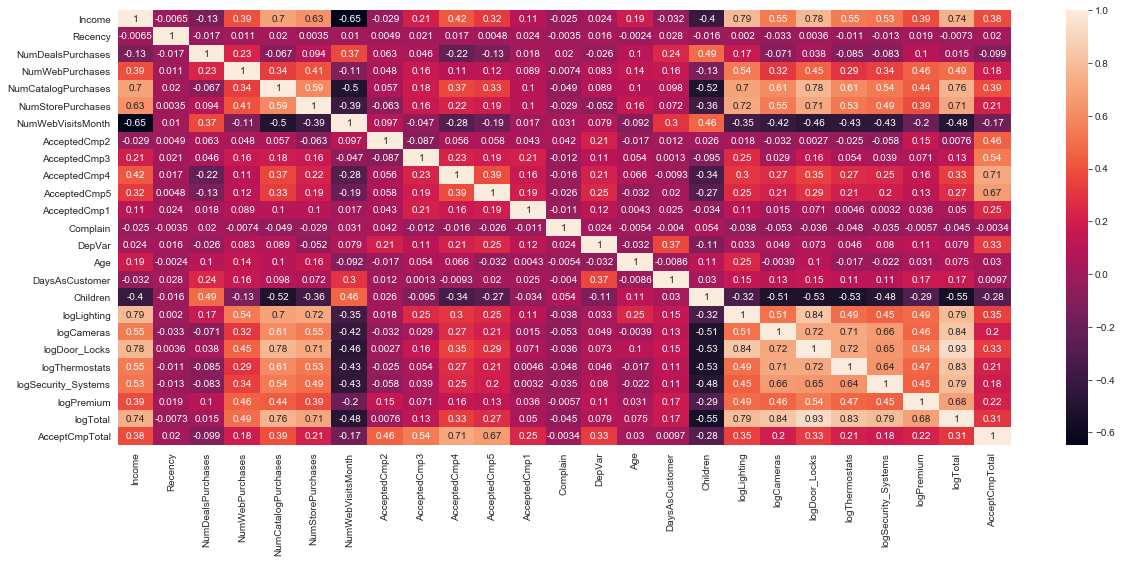

In [77]:
plt.figure(figsize=(20,8))
sns.heatmap(df_prep.corr(), annot=True)
plt.show()